In [122]:
from ipywidgets import interact, interactive, widgets

a_widget = widgets.FloatSlider(value = 0.01, min=0, max=100, description='a', readout_format = '.2f', continuous_update=False)
b_widget = widgets.FloatSlider(value = 0.01, min=0, max=2, description='b', readout_format = '.2f', continuous_update=False)
c_widget = widgets.FloatSlider(value = 0.01, min=0, max=1, description='c', readout_format = '.2f', continuous_update=False)



from scipy import exp

def f(x, a, b, c):
    return 1/(1+b*exp(c*(x-10)))

def plot_val(a, b, c):
    x = np.array(range(-30, 30, 1))
    y = f(x, a=a, b=b, c=c)
    plt.plot(x, y, label="a =" + str(i) + " b= " + str(j))
    plt.xlim((0,30))
    plt.legend()
    plt.show()
    
    

In [123]:
interact(plot_val, a = a_widget, b = b_widget, c = c_widget)

interactive(children=(FloatSlider(value=0.01, continuous_update=False, description='a'), FloatSlider(value=0.0…

<function __main__.plot_val(a, b, c)>

In [77]:
!pip install --upgrade ipywidgets

Requirement already up-to-date: ipywidgets in /usr/local/lib/python3.7/site-packages (7.5.1)


In [1]:
import sys
from sys import platform
if platform  == 'win32':
    sys.argv=["_", r"P:\rmahajan14\capstone_data\data", r"P:\rmahajan14\capstone_data\cache"]
if platform == 'linux' or platform == 'linux2':
    def full_path(p):
        return os.path.abspath(os.path.expanduser(p))
    sys.argv=["_", r"/mnt/d/DiDi_Ride_Data/data", r"/mnt/d/DiDi_Ride_Data/Ride_Data_Cache"]

In [2]:
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [3]:
from loader1 import *
from utils import *
from common import *
from experiment2 import *
# from sys import platform

import warnings
warnings.filterwarnings('ignore')

In [4]:
import time

In [5]:
start = '2016-11-01'
end = '2016-11-30'
orders = merge_order_df(start=start, end=end)

../Ride_Data_Cache/merged_orders.msgpack exists


In [6]:
driver_start_times = orders.loc[:, ['driver_id', 'ride_start_timestamp', 'ride_stop_timestamp', 'order_id']]\
            .drop_duplicates()

driver_start_times.sort_values(['driver_id', 'ride_start_timestamp'],
                               inplace=True)

driver_start_times['start_time_shifted'] = driver_start_times.groupby(
    'driver_id')['ride_start_timestamp'].shift(-1)

driver_start_times['diff'] = driver_start_times['start_time_shifted'] - driver_start_times['ride_stop_timestamp']

driver_start_times_no_na = driver_start_times.dropna()

driver_start_times_no_na['diff'] = driver_start_times_no_na['diff'].dt.total_seconds() / 60

driver_start_times_no_na['hour'] = driver_start_times_no_na.ride_stop_timestamp.dt.hour

tau = driver_start_times_no_na['diff'].median()

driver_start_times_no_na['new_diff'] = np.maximum(0, (driver_start_times_no_na['diff'] - tau))

stop_times = driver_start_times_no_na.ride_stop_timestamp
driver_start_times_no_na['total_hour'] = (stop_times.dt.hour * 3600 + stop_times.dt.minute * 60 + stop_times.dt.second) / 3600

# Modeling lambda
stats_df = driver_start_times_no_na.groupby('hour')['new_diff'].agg(['count', 'mean']).reset_index()
stats_df['count'] = stats_df['count'] / 10**7

In [20]:
from scipy import exp

def f(x, a, b):
    return 1/(a+exp(b*x))

In [35]:
x = np.array(range(-10, 10, 1))from scipy import exp

def f(x, a, b):
    return 1/(a+exp(b*x))

In [36]:
y = f(x, a=1, b=2)

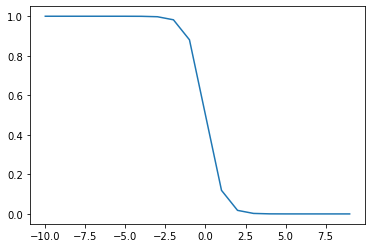

In [37]:
plt.plot(x, y)

In [38]:
y = f(x, a=1, b=100)

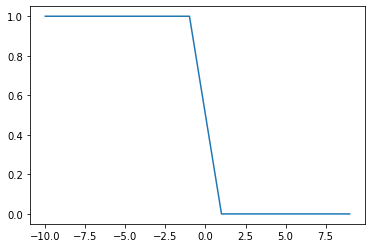

In [39]:
plt.plot(x, y)

In [40]:
y = f(x, a=10, b=1)

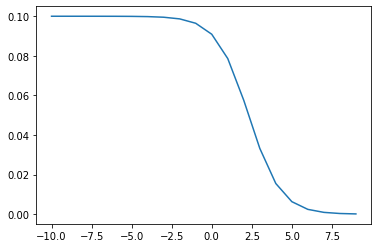

In [41]:
plt.plot(x, y)

In [42]:
a = [1, 5, 10, 30, 50]
b = 1

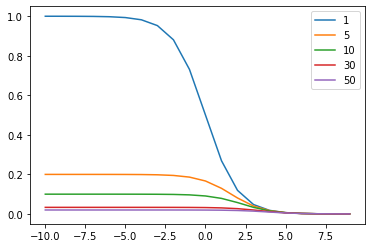

In [44]:
for i in a:
    y = f(x, a=i, b=b)
    plt.plot(x, y, label=i)
plt.legend()
plt.show()

In [49]:
b = [1, 2, 3, 5]
a = 1

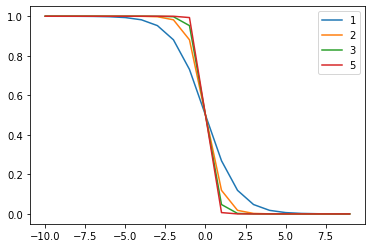

In [50]:
plt.figure(2)
for i in b:
    y = f(x, a=a, b=i)
    plt.plot(x, y, label=i)
plt.legend()
plt.show()

In [51]:
b = [-100, 100]
a = 1

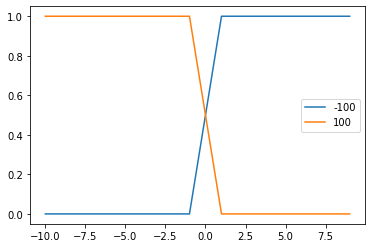

In [52]:
plt.figure(3)
for i in b:
    y = f(x, a=a, b=i)
    plt.plot(x, y, label=i)
plt.legend()
plt.show()

In [53]:
a = [0.01, 1]
b = [1, 2, 3, 5]

In [58]:
def plot_val(a, b):
    for i in a:
        for j in b:
            y = f(x, a=i, b=j)
            plt.plot(x, y, label="a =" + str(i) + " b= " + str(j))
    plt.legend()
    plt.show()

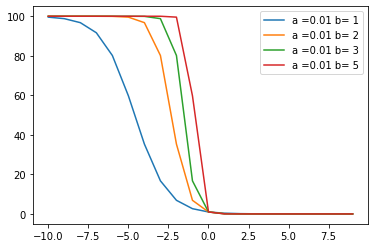

In [60]:
a = [0.01]
b = [1, 2, 3, 5]
plot_val(a, b)

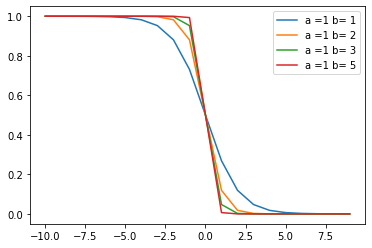

In [61]:
a = [1]
b = [1, 2, 3, 5]
plot_val(a, b)

In [63]:
ids = ['fc4b5a38298fb5a915d0728c8fc589a6', '7ece2b157a7b327d3ea67b073e5897ae', 'a91ec20642b71e2a5908940e4658b13a']

val = orders[orders['driver_id'].isin(ids)].sort_values(['driver_id', 'ride_start_timestamp'])

In [64]:
val.head(10)

,order_id,ride_start_timestamp,ride_stop_timestamp,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,ride_duration,driver_id
124593,9218956f8fb2b6d8fba7dd237ccf9337,2016-11-26 01:13:22,2016-11-29 07:41:42,104.093277,30.714981,104.08297,30.77913,4708.333333,7ece2b157a7b327d3ea67b073e5897ae
61058,4d8994b8627d3ad5478a8fdfc8fc6940,2016-11-22 09:05:04,2016-11-22 09:22:21,104.145011,30.689225,104.04279,30.71717,17.283333,a91ec20642b71e2a5908940e4658b13a
64219,517d481c3655a533c441a21d8ca0c964,2016-11-22 09:29:53,2016-11-22 09:47:24,104.046590,30.714960,104.08226,30.70414,17.516667,a91ec20642b71e2a5908940e4658b13a
151456,c0ebf7e6c64719f58ef2e2e744f37d31,2016-11-22 09:54:36,2016-11-25 09:34:16,104.091810,30.707220,104.09662,30.66205,4299.666667,a91ec20642b71e2a5908940e4658b13a
101806,7f791f2aadf0e2e8653bbc12884974a6,2016-11-23 13:12:22,2016-11-27 15:31:43,104.103950,30.698570,104.10829,30.72055,5899.350000,fc4b5a38298fb5a915d0728c8fc589a6


In [67]:
ids = ['fc4b5a38298fb5a915d0728c8fc589a6', '7ece2b157a7b327d3ea67b073e5897ae', 'a91ec20642b71e2a5908940e4658b13a']

val = orders[orders['driver_id'].isin(ids)].sort_values(['driver_id', 'ride_start_timestamp'])

In [74]:
orders[['pickup_latitude', 'pickup_longitude']].describe()

,pickup_latitude,pickup_longitude
count,6.104724e+06,6.104724e+06
mean,3.067281e+01,1.040722e+02
std,3.883711e-02,4.190349e-02
min,3.017543e+01,1.032591e+02
25%,3.065439e+01,1.040498e+02
50%,3.067038e+01,1.040733e+02
75%,3.069183e+01,1.040977e+02
max,3.109166e+01,1.045900e+02


In [71]:
val['pickup_latitude']

61058    30.689225
64219    30.714960
Name: pickup_latitude, dtype: float64

In [68]:
val.head(10)

,order_id,ride_start_timestamp,ride_stop_timestamp,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,ride_duration,driver_id
61058,4d8994b8627d3ad5478a8fdfc8fc6940,2016-11-22 09:05:04,2016-11-22 09:22:21,104.145011,30.689225,104.04279,30.71717,17.283333,a91ec20642b71e2a5908940e4658b13a
64219,517d481c3655a533c441a21d8ca0c964,2016-11-22 09:29:53,2016-11-22 09:47:24,104.046590,30.714960,104.08226,30.70414,17.516667,a91ec20642b71e2a5908940e4658b13a
